# 12-create-flat-file
This notebook takes all the cleaned CIN Census and merges them into a unique excel csv where each row is a date event (referral, CIN start, CIN end, etc.) with demographics info and a few relevant info to the event.
This means that there are a LOT of columns, potentially.

In [2]:
import glob
import os
import yaml
from wrangling.log.cin_log import build_cinrecord

%run "00-config.ipynb"
%load_ext autoreload
%autoreload 2

<class 'str'>


### Config

In [3]:
localauthority = 'Waltham Forest' # Write name of LA - this must match the folder name

In [5]:
# Check there are CIN files in this folder
cin_files = glob.glob(os.path.join(cin_cleaned, localauthority, "*.xml"))
if len(cin_files)>0:
    print("Found {} clean CIN files for {} in folder {}".format(len(cin_files), localauthority, cin_cleaned))
else:
    print("!!! No CIN files for {}".format(localauthority))

Found 4 clean CIN files for Waltham Forest in folder O:\LIIA Data Project\data\cincensus\cleaned


### 1. Run programme (takes a few minutes depending on quantity of data)

In [6]:
# Create CIN record
cin = build_cinrecord(cin_files)

Extracting data from file 1 out of 4 from CIN Census
Extracting data from file 2 out of 4 from CIN Census
Extracting data from file 3 out of 4 from CIN Census
Extracting data from file 4 out of 4 from CIN Census
Done!


### 2. Quick data checks - does it look sensible?

In [7]:
# Print a few values - check they make sense

print(
    "\n{} unique Child IDs".format(len(cin.LAchildID.unique())),
    "\n{} first event".format(cin.Date.min()),
    "\n{} last event".format(cin.Date.max())
)

for col in ['Date', 'LAchildID', 'GenderCurrent', 'Ethnicity', 'Disabilities', 'PersonBirthDate']:
    print("\n{} missing values for {}".format(cin[col].isna().sum(), col))


13051 unique Child IDs 
1995-10-03 first event 
2020-03-31 last event

0 missing values for Date

0 missing values for LAchildID

0 missing values for GenderCurrent

0 missing values for Ethnicity

210 missing values for Disabilities

582 missing values for PersonBirthDate


<AxesSubplot:xlabel='Date'>

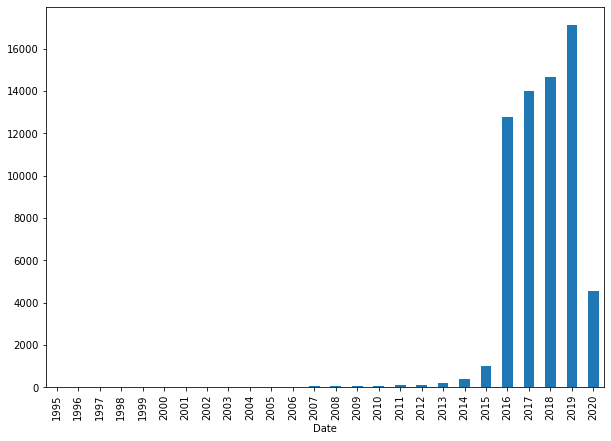

In [8]:
# Look at event distribution
cin["Date"] = cin["Date"].astype("datetime64")
cin.groupby(cin["Date"].dt.year)['Date'].count().plot(kind="bar", figsize=(10,7))

### 3. Save to csv

In [9]:
# Add column with LA name
cin['LA'] = localauthority

# Save
cin.to_csv(os.path.join(flatfile_folder, "{}_flatcin.csv".format(localauthority)), index=False)